In [19]:
# https://quera.org/contest/assignments/4367/download_problem_initial_project/125316/
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,mean_squared_error,r2_score,mean_absolute_error,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
# from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# from sklearn.decomposition import PCA
# import os
# import cv2
# import random
# import pickle

In [20]:
ds=pd.read_csv('D:\\datasets\\insurance analysis\\travel_insurance\\train.csv')

ds.drop('Customer Id',axis=1,inplace=True)

TheColumns=['GraduateOrNot','FrequentFlyer','EverTravelledAbroad','TravelInsurance']

for column in TheColumns:
    for index in ds.index:
        if ds[column].iloc[index]=='Yes':
            ds[column].iloc[index]=1
        elif ds[column].iloc[index]=='No':
            ds[column].iloc[index]=0
    ds[column]=ds[column].astype(str).astype(int)

for index in ds.index:
    if ds['Employment Type'].iloc[index]=='Private Sector/Self Employed':
        ds['Employment Type'].iloc[index]=1
    elif ds['Employment Type'].iloc[index]=='Government Sector':
        ds['Employment Type'].iloc[index]=-1
ds['Employment Type']=ds['Employment Type'].astype(str).astype(int)

C:\Users\msmj\AppData\Local\Temp\ipykernel_15556\1359110302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[column].iloc[index]=1
C:\Users\msmj\AppData\Local\Temp\ipykernel_15556\1359110302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[column].iloc[index]=1
C:\Users\msmj\AppData\Local\Temp\ipykernel_15556\1359110302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[column].iloc[index]=1
C:\Users\msmj\AppData\Loc

In [21]:
ds,test=train_test_split(ds,test_size=0.15,shuffle=True,random_state=42)
x_test=test.drop('TravelInsurance',axis=1)
y_test=test['TravelInsurance']

X=ds.drop('TravelInsurance',axis=1)
y=ds['TravelInsurance']
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42,shuffle=True)

In [22]:
scaler=MinMaxScaler()

scaled_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(data=scaled_train,columns=x_train.columns,index=x_train.index)

scaled_test=scaler.fit_transform(x_test)
x_test=pd.DataFrame(data=scaled_test,columns=x_test.columns,index=x_test.index)

scaled_val=scaler.fit_transform(x_val)
x_val=pd.DataFrame(data=scaled_val,columns=x_val.columns,index=x_val.index)

In [23]:
x_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
1032,1.0,1.0,0.0,0.433333,1.000000,0.0,0.0,0.0
450,0.3,1.0,1.0,0.333333,0.428571,0.0,0.0,0.0
129,0.7,0.0,1.0,0.366667,0.142857,1.0,0.0,0.0
1209,0.3,0.0,1.0,0.200000,0.285714,0.0,0.0,0.0
346,0.4,1.0,1.0,0.500000,0.714286,1.0,0.0,0.0


In [125]:
model=keras.models.Sequential([
    keras.layers.Dense(150,activation='elu',kernel_initializer="he_normal",kernel_constraint=keras.constraints.max_norm(0.7),input_shape=(8,)),
    keras.layers.Dropout(0.12),
    keras.layers.Dense(400,activation='elu',kernel_initializer="he_normal",kernel_constraint=keras.constraints.max_norm(0.6)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100,activation='elu',kernel_initializer="he_normal",kernel_constraint=keras.constraints.max_norm(0.7)),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(150,activation='elu',kernel_initializer="he_normal",kernel_constraint=keras.constraints.max_norm(0.7)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1,activation="sigmoid",kernel_initializer="he_normal",kernel_constraint=keras.constraints.max_norm(0.8))
])
# model.build(input_shape=(712,3))
model.summary()
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Nadam(learning_rate=0.001),metrics=['accuracy'])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 150)               1350      
                                                                 
 dropout_103 (Dropout)       (None, 150)               0         
                                                                 
 dense_136 (Dense)           (None, 400)               60400     
                                                                 
 dropout_104 (Dropout)       (None, 400)               0         
                                                                 
 dense_137 (Dense)           (None, 100)               40100     
                                                                 
 dropout_105 (Dropout)       (None, 100)               0         
                                                                 
 dense_138 (Dense)           (None, 150)             

In [126]:
history=model.fit(x_train,y_train,epochs=400,validation_data=(x_val,y_val))

Epoch 1/400
36/36 [==============================] - 1s 11ms/step - loss: 0.6405 - accuracy: 0.7178 - val_loss: 0.6005 - val_accuracy: 0.7291
Epoch 2/400
36/36 [==============================] - 0s 8ms/step - loss: 0.5524 - accuracy: 0.7631 - val_loss: 0.5713 - val_accuracy: 0.7537
Epoch 3/400
36/36 [==============================] - 0s 7ms/step - loss: 0.5434 - accuracy: 0.7596 - val_loss: 0.5720 - val_accuracy: 0.7537
Epoch 4/400
36/36 [==============================] - 0s 7ms/step - loss: 0.5324 - accuracy: 0.7692 - val_loss: 0.5662 - val_accuracy: 0.7537
Epoch 5/400
36/36 [==============================] - 0s 7ms/step - loss: 0.5296 - accuracy: 0.7744 - val_loss: 0.5572 - val_accuracy: 0.7438
Epoch 6/400
36/36 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.7805 - val_loss: 0.5610 - val_accuracy: 0.7488
Epoch 7/400
36/36 [==============================] - 0s 7ms/step - loss: 0.5278 - accuracy: 0.7744 - val_loss: 0.5479 - val_accuracy: 0.7586
Epoch 8/400


<Axes: >

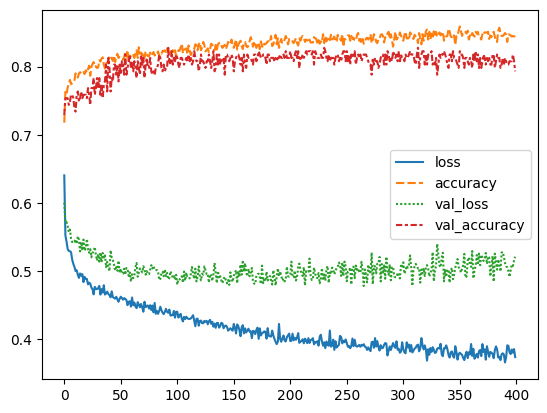

In [127]:
sns.lineplot(history.history)

In [128]:
prediction=model.predict(x_test)
auc_roc=roc_auc_score(y_test, prediction)
score=((auc_roc*100)-50)*2
print(score)

8/8 [==============================] - 0s 1ms/step
70.43034605146408


In [130]:
# current model is 70.43
# model.save('model.h5')